In [1]:
%load_ext autoreload
%autoreload 2

%load_ext line_profiler

In [2]:
import pandas as pd
import numpy as np

import  matplotlib.pyplot as plt
import pickle

from chemistry import Molecule
from util import score
from pprint import pprint


In [3]:
with open('../data/molecules.pickle', 'rb') as f:
    molecules = pickle.load(f)

In [4]:
structures = pd.read_feather('../data/structures.feather')
labelled = pd.read_feather('../data/train.feather')
unlabelled = pd.read_feather('../data/test.feather')

0 [1084878.2]
1 [0.]
2 [1084878.2]
3 [0.]
4 [0.]
5 [0.]
6 [4339513.]
7 [0.]
8 [0.]
9 [0.]
10 [1084878.2]
11 [0.]
12 [13018540.]
13 [0.]
14 [0.]
15 [0.]
16 [0.]
17 [0.]
18 [0.]
19 [0.]
20 [0.]
21 [0.]
22 [0.]
23 [0.]
24 [0.]
25 [0.]
26 [0.]
27 [0.]
28 [1084878.2]
29 [0.]
30 [13018540.]
31 [1184654.6]
32 [1084878.2]
33 [4.4588496e+08]
34 [0.]
35 [0.]
36 [0.]
37 [0.]
38 [0.]
39 [0.]
1JHC score: 1.617827011327883


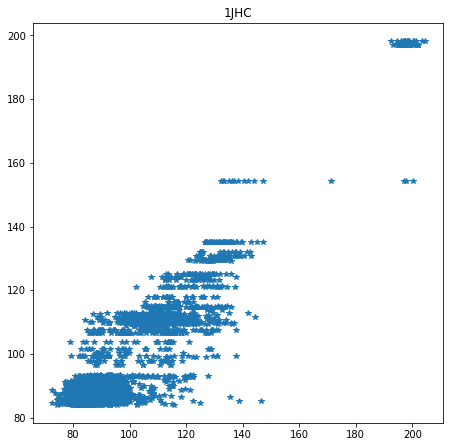

In [19]:
from models import XGBModel, LGBModel
from models import partition_data

def test(data):
    plt.figure(figsize=(25, 25))
    for i, t in enumerate(sorted(data.type.unique())[0:1], 1):
        data_df = data[data.type == t]
        train_df, test_df = partition_data(data_df)
        
        model = LGBModel(dict(molecules=molecules, 
                              structures=structures),
                         dict(n_jobs=8,
                              max_depth=9,
                              boosting_type='gbdt',
                              num_leaves=128,
                              min_child_samples=20,
                              learning_rate=0.2,
                              n_estimators=1000,
                              reg_alpha=0.1,
                              reg_lambda=0.3,
                              subsample_freq = 1,
                              subsample = 0.9,
                              verbose=500))
        
        model.corr(train_df, train_df)
        
        model.fit(train_df, train_df)
        output, score = model.evaluate(test_df, test_df)
        print(f'{t} score: {score}')
        plt.subplot(3, 3, i)
        plt.plot(test_df.scalar_coupling_constant, output, '*')
        plt.title(t)
    plt.show()
        
test(labelled.head(100000))